In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('../Dados/BankChurners_preprocessed.csv')
data.rename({'Less_than_$40K':'Less_than_40K'}, axis=1, inplace=True)

In [3]:
data.corr()['Problem'].sort_values(ascending=False).to_frame()

,Problem
Problem,1.000000
Contacts_Count_12_mon,0.231497
Months_Inactive_12_mon,0.185385
Dependent_count,0.048197
Less_than_40K,0.043104
college_or_above,0.027660
Customer_Age_43-50,0.014575
Months_on_book,0.007891
Customer_Age_50-68,0.007578
Avg_Open_To_Buy,-0.008899


In [4]:
top_03_problema = data.corr()['Problem'].sort_values(ascending=False)[1:4]
top_03_nao_problema = data.corr()['Problem'].sort_values(ascending=True)[:3]

In [5]:
top_03_problema

Contacts_Count_12_mon     0.231497
Months_Inactive_12_mon    0.185385
Dependent_count           0.048197
Name: Problem, dtype: float64

In [6]:
top_03_nao_problema

Total_Trans_Ct        -0.527872
Total_Ct_Chng_Q4_Q1   -0.426108
Total_Trans_Amt       -0.393252
Name: Problem, dtype: float64

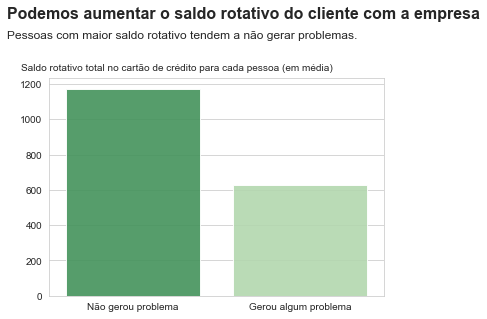

In [7]:
#Total_Revolving_Bal

y = []
x = []

y.append(data.query('Problem == 0')['Total_Revolving_Bal'].mean())
y.append(data.query('Problem == 1')['Total_Revolving_Bal'].mean())

x.append('Não gerou problema')
x.append('Gerou algum problema')

sns.set_style('whitegrid')

ax = sns.barplot(x=x, y=y, alpha=0.9, palette='Greens_r')

ax.text(x=-0.75,
        y=1570,
        s='Podemos aumentar o saldo rotativo do cliente com a empresa',
        fontsize=16, weight='bold')

ax.text(x=-0.75,
        y=1460,
        s='Pessoas com maior saldo rotativo tendem a não gerar problemas.',
        fontsize=12)

ax.text(x=-0.67,
        y=1280,
        s='Saldo rotativo total no cartão de crédito para cada pessoa (em média)')

#plt.xlabel('Problema')

plt.savefig('../Imagens/saldo_rotativo.jpeg', bbox_inches='tight')
plt.show()

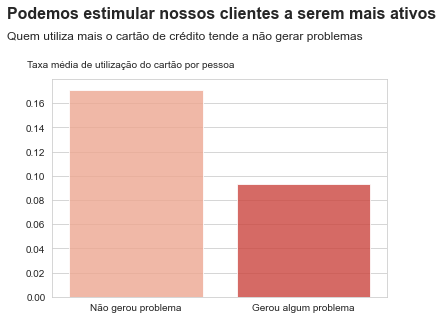

In [8]:
y = []
x = []

y.append(data.query('Problem == 0')['Avg_Utilization_Ratio'].mean())
y.append(data.query('Problem == 1')['Avg_Utilization_Ratio'].mean())

x.append('Não gerou problema')
x.append('Gerou algum problema')

sns.set_style('whitegrid')

ax = sns.barplot(x=x, y=y, alpha=0.8, palette='Reds')

ax.text(x=-0.77,
        y=0.23,
        s='Podemos estimular nossos clientes a serem mais ativos',
        fontsize=16, weight='bold')

ax.text(x=-0.77,
        y=0.213,
        s='Quem utiliza mais o cartão de crédito tende a não gerar problemas',
        fontsize=12)

ax.text(x=-0.65,
        y=0.19,
        s='Taxa média de utilização do cartão por pessoa')

#plt.xlabel('Problema')

plt.savefig('../Imagens/utilizacao_do_cartao.jpeg', bbox_inches='tight')
plt.show()

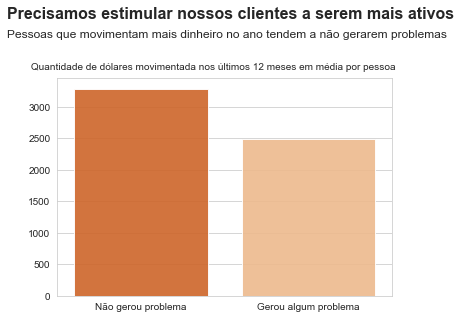

In [9]:
y = []
x = []

y.append(data.query('Problem == 0')['Total_Trans_Amt'].mean())
y.append(data.query('Problem == 1')['Total_Trans_Amt'].mean())

x.append('Não gerou problema')
x.append('Gerou algum problema')

sns.set_style('whitegrid')

ax = sns.barplot(x=x, y=y, alpha=0.9, palette='Oranges_r')

ax.text(x=-0.8,
        y=4400,
        s='Precisamos estimular nossos clientes a serem mais ativos',
        fontsize=16, weight='bold')

ax.text(x=-0.8,
        y=4100,
        s='Pessoas que movimentam mais dinheiro no ano tendem a não gerarem problemas',
        fontsize=12)

ax.text(x=-0.66,
        y=3600,
        s='Quantidade de dólares movimentada nos últimos 12 meses em média por pessoa')

plt.savefig('../Imagens/dinheiro_movimentado.jpeg', bbox_inches='tight')
plt.show()

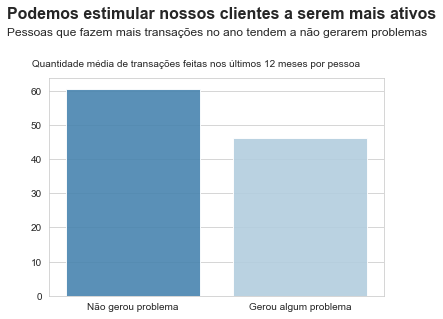

In [10]:
y = []
x = []

y.append(data.query('Problem == 0')['Total_Trans_Ct'].mean())
y.append(data.query('Problem == 1')['Total_Trans_Ct'].mean())

x.append('Não gerou problema')
x.append('Gerou algum problema')

sns.set_style('whitegrid')

ax = sns.barplot(x=x, y=y, alpha=0.9, palette='Blues_r')

ax.text(x=-0.75,
        y=81,
        s='Podemos estimular nossos clientes a serem mais ativos',
        fontsize=16, weight='bold')

ax.text(x=-0.75,
        y=76,
        s='Pessoas que fazem mais transações no ano tendem a não gerarem problemas',
        fontsize=12)

ax.text(x=-0.6,
        y=67,
        s='Quantidade média de transações feitas nos últimos 12 meses por pessoa')


plt.savefig('../Imagens/num_transacoes.jpeg', bbox_inches='tight')
plt.show()

In [11]:
data.query('Problem == 1')['Credit_Limit'].sum()

8163860.950000001

In [12]:
data.query('Problem == 1')['Credit_Limit'].mean()

5017.7387523048565

In [13]:
arq_scaler = open('../Arquivos/scaler.pk', 'rb')
arq_model = open('../Arquivos/modelo.pk', 'rb')

X, y = data.drop('Problem', axis=1), data['Problem']

scaler = pickle.load(arq_scaler)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, test_size=0.3)

X_test = scaler.transform(X_test)

model = pickle.load(arq_model)

matrix = confusion_matrix(y_test, model.predict(X_test))

arq_scaler.close()

C:\Users\vinip\Anaconda3\envs\tf\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Less_than_40K
Feature names seen at fit time, yet now missing:
- Less_than_$40K

  warnings.warn(message, FutureWarning)


In [14]:
nao_verdadeiro = matrix[0]
sim_verdadeiro = matrix[1]

In [15]:
nao_verdadeiro

array([415,  65], dtype=int64)

In [16]:
sim_verdadeiro

array([ 88, 409], dtype=int64)

In [17]:
total = sim_verdadeiro[0] + sim_verdadeiro[1] + nao_verdadeiro[0] + nao_verdadeiro[1]
total_erros = nao_verdadeiro[1] + sim_verdadeiro[0]
total_acertos = total - total_erros

In [18]:
total

977

In [19]:
total_erros

153

In [20]:
total_erros / total

0.15660184237461616

In [21]:
total_acertos / total

0.8433981576253838

In [22]:
#Falso negativo
sim_verdadeiro[0] / total_erros

0.5751633986928104

In [23]:
#Falso positivo
nao_verdadeiro[1] / total_erros

0.42483660130718953

- 84% de acertos
- 16% de erros


- dos erros cometidos:
    - 58% foram falsos negativos
    - 42% foram falsos positivos